In [2]:
import numpy as np
import sklearn
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('datasets/FPU2_ML_2021-04-29.csv')

In [10]:
df.columns

Index(['field', 'source', 'time', 'temperature', 'ra', 'dec', 'az', 'alt',
       'airmass', 'ha', 'FU1_ra', 'FU1_dec', 'FU1_Delta_ra', 'FU1_Delta_dec',
       'FU1_distance', 'FU1_Delta_Teff', 'FU1_X_calculated',
       'FU1_Y_calculated', 'FU1_X_observed', 'FU1_Y_observed', 'FU1_Delta_X',
       'FU1_Delta_Y', 'FU2_ra', 'FU2_dec', 'FU2_Delta_ra', 'FU2_Delta_dec',
       'FU2_distance', 'FU2_Delta_Teff', 'FU2_X_calculated',
       'FU2_Y_calculated', 'FU2_X_observed', 'FU2_Y_observed', 'FU2_Delta_X',
       'FU2_Delta_Y', 'FU3_ra', 'FU3_dec', 'FU3_Delta_ra', 'FU3_Delta_dec',
       'FU3_distance', 'FU3_Delta_Teff', 'FU3_X_calculated',
       'FU3_Y_calculated', 'FU3_X_observed', 'FU3_Y_observed', 'FU3_Delta_X',
       'FU3_Delta_Y', 'FU4_ra', 'FU4_dec', 'FU4_Delta_ra', 'FU4_Delta_dec',
       'FU4_distance', 'FU4_Delta_Teff', 'FU4_X_calculated',
       'FU4_Y_calculated', 'FU4_X_observed', 'FU4_Y_observed', 'FU4_Delta_X',
       'FU4_Delta_Y', 'FU5_ra', 'FU5_dec', 'FU5_Delta_ra', 'FU5

In [11]:
# Columns have extra spaces; let's correct that (and remove field, just to keep a fully numeric dataframe; why?)
df = pd.DataFrame(df.values[:, 2:], columns=df.columns.str.strip(' ')[2:], dtype='float64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              7221 non-null   float64
 1   temperature       7221 non-null   float64
 2   ra                7221 non-null   float64
 3   dec               7221 non-null   float64
 4   az                7221 non-null   float64
 5   alt               7221 non-null   float64
 6   airmass           7221 non-null   float64
 7   ha                7221 non-null   float64
 8   FU1_ra            7221 non-null   float64
 9   FU1_dec           7221 non-null   float64
 10  FU1_Delta_ra      7221 non-null   float64
 11  FU1_Delta_dec     7221 non-null   float64
 12  FU1_distance      7221 non-null   float64
 13  FU1_Delta_Teff    7221 non-null   float64
 14  FU1_X_calculated  7221 non-null   float64
 15  FU1_Y_calculated  7221 non-null   float64
 16  FU1_X_observed    7221 non-null   float64


In [13]:
df.describe().loc[: , ['FU1_X_calculated', 'FU2_X_calculated', 'FU3_X_calculated', 'FU4_X_calculated']]

,FU1_X_calculated,FU2_X_calculated,FU3_X_calculated,FU4_X_calculated
count,7.221000e+03,7.221000e+03,7.221000e+03,7.221000e+03
mean,1.885576e+06,-1.012106e+06,5.597995e+05,-4.208719e+05
std,1.274103e+07,1.022569e+07,1.110122e+07,1.052727e+07
min,-2.069980e+07,-1.933636e+07,-2.192008e+07,-2.276129e+07
25%,-1.081862e+07,-8.801211e+06,-7.855069e+06,-7.509870e+06
50%,1.468431e+06,-1.317861e+06,-2.440450e+05,-3.858290e+05
75%,1.192408e+07,7.093472e+06,1.039587e+07,6.256762e+06
max,2.307571e+07,2.224130e+07,2.016821e+07,2.128280e+07


array([[<AxesSubplot:title={'center':'FU1_Y_calculated'}>,
        <AxesSubplot:title={'center':'FU2_Y_calculated'}>],
       [<AxesSubplot:title={'center':'FU3_Y_calculated'}>,
        <AxesSubplot:title={'center':'FU4_Y_calculated'}>],
       [<AxesSubplot:title={'center':'FU5_Y_calculated'}>,
        <AxesSubplot:>]], dtype=object)

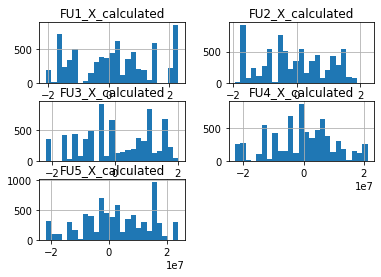

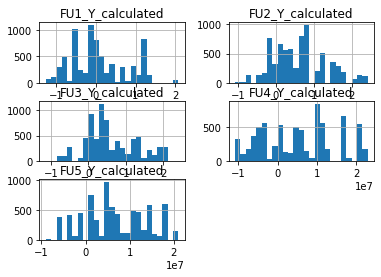

In [8]:
df.hist(['FU1_X_calculated', 'FU2_X_calculated', 'FU3_X_calculated', 'FU4_X_calculated', 'FU5_X_calculated'], bins=25)
df.hist(['FU1_Y_calculated', 'FU2_Y_calculated', 'FU3_Y_calculated', 'FU4_Y_calculated', 'FU5_Y_calculated'], bins=25)

In [14]:
# Compute X and Y differences for each arm
for i in range(1, 6):
    for d in ['X', 'Y']:
        df['FU{}_d{}'.format(i, d)] = df['FU{}_{}_observed'.format(i, d)] - df['FU{}_{}_calculated'.format(i, d)]

array([[<AxesSubplot:title={'center':'FU1_dX'}>,
        <AxesSubplot:title={'center':'FU2_dX'}>],
       [<AxesSubplot:title={'center':'FU3_dX'}>,
        <AxesSubplot:title={'center':'FU4_dX'}>],
       [<AxesSubplot:title={'center':'FU5_dX'}>, <AxesSubplot:>]],
      dtype=object)

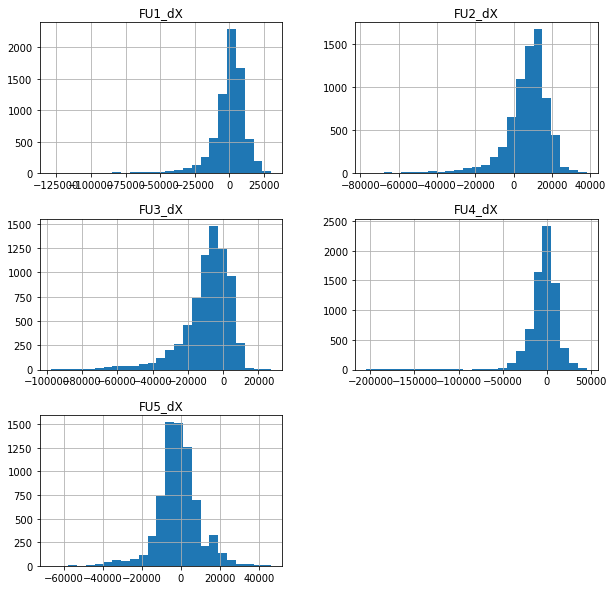

In [10]:
df.hist(['FU1_dX', 'FU2_dX', 'FU3_dX', 'FU4_dX', 'FU5_dX'], bins=25, figsize=(10, 10))

In [16]:
# Drop some columns
cols_to_drop = []

for i in range(1, 6):
    for d in ['X', 'Y']:
        cols_to_drop.append('FU{}_{}_observed'.format(i, d))
        
df2 = df.drop(labels=cols_to_drop, axis=1, inplace=False)

In [6]:
df2.corr(method='spearman').FU1_dX.abs().sort_values(ascending=False)

AttributeError: 'DataFrame' object has no attribute 'FU1_dX'

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df2.FU2_dX, df2.FU1_dX, s=df2.FU5_dX/1e2, c=df2.FU4_dX, alpha=0.3, label='FU5_dX')
plt.legend(loc=0)
plt.colorbar()

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df2.ha, df2.FU1_dX, c=df2.dec, alpha=1, label='FU5_dX')
plt.legend(loc=0)
plt.colorbar(label='Dec')

In [17]:
# cond = df2.FU1_dX > -30000
cond = (df2.alt >= 25.0) & (df2.dec > -80.0)

X = df2.loc[cond, ('ha', 'dec', 'airmass', 'alt', 'FU1_Delta_dec', 'FU1_Delta_ra', 'FU1_X_calculated', 'FU1_Y_calculated')]
t = df2.loc[cond, ['FU1_dX', 'FU1_dY', 'FU2_dX', 'FU2_dY', 'FU3_dX', 'FU3_dY', 'FU4_dX', 'FU4_dY', 'FU5_dX', 'FU5_dY']]

In [34]:
from utils import vif

r2dict = vif(X)

In [35]:
print(r2dict)

{'ha': 0.31128656553863676, 'dec': 0.47084045533595287, 'airmass': 0.8772972212876039, 'alt': 0.8663096907962763, 'FU1_Delta_dec': 0.999995330407146, 'FU1_Delta_ra': 0.9587697665686241, 'FU1_X_calculated': 0.8542672406683133, 'FU1_Y_calculated': 0.9999953130928437}


In [59]:
# In view of large colineality, remove some columns
X = df2.loc[cond, ('ha', 'dec', 'alt', 
                   #'FU1_X_calculated',# 'FU2_X_calculated', 'FU3_X_calculated', 'FU4_X_calculated', 'FU5_X_calculated',
                   #'FU1_Delta_X_calculated',# 'FU2_Delta_X', 'FU3_Delta_X', 'FU4_Delta_X', 'FU5_Delta_X',
                   #'FU1_Y_calculated', #'FU2_Y_calculated', 'FU3_Y_calculated', 'FU4_Y_calculated', 'FU5_Y_calculated',
                   #'FU1_Delta_Y_calculated', 'FU2_Delta_Y_calculated', 'FU3_Delta_Y_calculated', 'FU4_Delta_Y_calculated', 
                   #'FU5_Delta_Y_calculated',
                   'FU1_Delta_Teff', #'FU2_Delta_Teff', 'FU3_Delta_Teff', 'FU4_Delta_Teff', 'FU5_Delta_Teff')]
                   #'FU1_distance', 
                   'temperature',
                   'FU1_Delta_dec', 'FU1_Delta_ra', 'FU1_ra'
                  )]

t = df2.loc[cond, ['FU1_dX', 'FU1_dY']]#, 'FU2_dX', 'FU2_dY', 'FU3_dX', 'FU3_dY', 'FU4_dX', 'FU4_dY', 'FU5_dX', 'FU5_dY']]
from utils import vif
print(vif(X)[0])

{'ha': 0.26785598139236955, 'dec': 0.27784440797655086, 'alt': 0.2961243445345382, 'FU1_Delta_Teff': 0.1993574216792522, 'temperature': 0.07052752698508746, 'FU1_Delta_dec': 0.1278626420294171, 'FU1_Delta_ra': 0.14737942934825143, 'FU1_ra': 0.1524466170230927}


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split train test
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=1234)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, t_train)

# Metrics
y_train = lr.predict(X_train)
y_test = lr.predict(X_test)

print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train, y_train))))
print('RMSE (test): {:.2f}'.format(np.sqrt(mean_squared_error(t_test, y_test))))

RMSE (train): 8053.01
RMSE (test): 8400.69


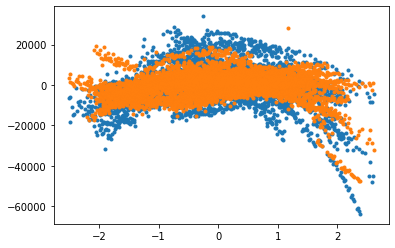

In [62]:
res = t_train - y_train

plt.plot(X_train[:, 0], res, '.')

In [63]:
from utils import hat_matrix
H = hat_matrix(X_train)

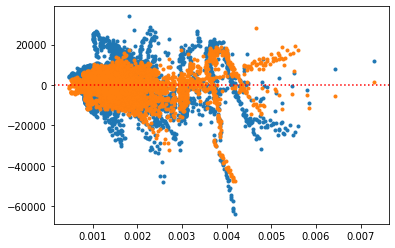

In [64]:
plt.plot(np.diag(H), res, '.')
plt.axhline(0, color='r', ls=':')

In [32]:
# Identify high leverage points
dfAll = pd.read_csv('datasets/FPU2_ML_2021-04-29.csv')

calt = (dfAll.alt > 25.0)

# Split train test
X_train_all, _, _, _ = train_test_split(dfAll.loc[calt], t, test_size=0.2, random_state=1234)

# dfAll.loc[calt]
X_train_all.loc[np.diag(H) > 0.006, 'field']

1879    TOI-1224_W_2020-12-08.fits
1838    TOI-1224_W_2020-12-08.fits
1895    TOI-1224_W_2020-12-08.fits
1862    TOI-1224_W_2020-12-08.fits
1841    TOI-1224_W_2020-12-08.fits
1894    TOI-1224_W_2020-12-08.fits
1831    TOI-1224_W_2020-12-08.fits
1863    TOI-1224_W_2020-12-08.fits
1890    TOI-1224_W_2020-12-08.fits
1856    TOI-1224_W_2020-12-08.fits
1837    TOI-1224_W_2020-12-08.fits
1893    TOI-1224_W_2020-12-08.fits
3179    TOI-1224_W_2020-12-08.fits
1853    TOI-1224_W_2020-12-08.fits
1850    TOI-1224_W_2020-12-08.fits
1845    TOI-1224_W_2020-12-08.fits
1847    TOI-1224_W_2020-12-08.fits
1857    TOI-1224_W_2020-12-08.fits
1874    TOI-1224_W_2020-12-08.fits
1854    TOI-1224_W_2020-12-08.fits
1889    TOI-1224_W_2020-12-08.fits
1839    TOI-1224_W_2020-12-08.fits
1860    TOI-1224_W_2020-12-08.fits
1891    TOI-1224_W_2020-12-08.fits
1865    TOI-1224_W_2020-12-08.fits
1844    TOI-1224_W_2020-12-08.fits
1881    TOI-1224_W_2020-12-08.fits
1867    TOI-1224_W_2020-12-08.fits
1883    TOI-1224_W_2

**What out for those outliers!**


In [ ]:
# Remove high-leverage points
ind = np.diag(H) > 0.05

lr.fit(X_train[~ind], t_train[~ind])
y_train = lr.predict(X_train[~ind])

print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train[~ind], y_train))))



In [ ]:
plt.semilogx(np.diag(H)[~ind], y_train - t_train[~ind], '.')
plt.axhline(0, color='r', ls=':')

## Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

pr = LinearRegression(fit_intercept=False)

pr.fit(X_train_poly, t_train)
y_train = pr.predict(X_train_poly)
y_test =  pr.predict(X_test_poly)
print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train, y_train))))
print('RMSE (test): {:.2f}'.format(np.sqrt(mean_squared_error(t_test, y_test))))

RMSE (train): 1862.12
RMSE (test): 2123.96


In [20]:
X_train_poly.shape

(1900, 45)

## Decision Tree

In [21]:
# Let's hit it harder
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=51)
dt.fit(X_train, t_train)

# Metrics
y_train = dt.predict(X_train)
y_test = dt.predict(X_test)

print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train, y_train))))
print('RMSE (test): {:.2f}'.format(np.sqrt(mean_squared_error(t_test, y_test))))

RMSE (train): 0.00
RMSE (test): 3329.61


In [22]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(dt, {'max_depth': range(2, 100)}, cv=5, scoring='neg_mean_squared_error')
gscv.fit(X_train, t_train)

print(gscv.best_params_)
print('Best RMSE (train): {:2f}'.format(np.sqrt(-gscv.best_score_)))
print('Best RMSE (test): {:2f}'.format(np.sqrt(mean_squared_error(gscv.best_estimator_.predict(X_test), t_test))))

{'max_depth': 39}
Best RMSE (train): 2902.057454
Best RMSE (test): 3273.882080


## Random Forests

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train, t_train)

y_train = rfr.predict(X_train)
y_test =  rfr.predict(X_test)
print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train, y_train))))
print('RMSE (test): {:.2f}'.format(np.sqrt(mean_squared_error(t_test, y_test))))

RMSE (train): 909.13
RMSE (test): 2684.67


In [ ]:
plt.hist(y_test - t_test, 25)

In [ ]:
RandomForestRegressor?

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rscv = RandomizedSearchCV(rfr, {'max_depth': randint(2, 20), 'n_estimators': randint(100, 500)}, 
                          n_iter=20, cv=5, scoring='neg_mean_squared_error')
rscv.fit(X_train, t_train)

print(rscv.best_params_)
print('Best RMSE (train): {:2f}'.format(np.sqrt(-rscv.best_score_)))
print('Best RMSE (test): {:2f}'.format(np.sqrt(mean_squared_error(rscv.best_estimator_.predict(X_test), t_test))))

In [24]:
y_train = rscv.best_estimator_.predict(X_train)
y_test = rscv.best_estimator_.predict(X_test)

NameError: name 'rscv' is not defined

In [ ]:
plt.hist(y_test - t_test, 25)

In [ ]:
plt.scatter(t_train, y_train, label='train data')
plt.scatter(t_test, y_test, label='test data')
plt.legend(loc=0)
plt.xlabel('FU1_dX [target]', fontsize=16)
plt.ylabel('FU1_dX [predicted]', fontsize=16)
plt.savefig('/Users/rodrigo/EXOML/extra/plots/RF_run1.pdf')

I am tempted to repeat everything for points >-30000

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr  = GradientBoostingRegressor()

gbr.fit(X_train, t_train)
y_train = gbr.predict(X_train)
y_test = gbr.predict(X_test)

print('RMSE (train): {:.2f}'.format(np.sqrt(mean_squared_error(t_train, y_train))))
print('RMSE (test): {:.2f}'.format(np.sqrt(mean_squared_error(t_test, y_test))))